# Clasificador de tejido sano y tejido cancerígeno en imagenes microscópicas del esófago

## Paso 1. Cargar librerías y módulos requerdidos

In [1]:
import os            #módulo para manejar carpetas y archivos en nuestro ordenador
import random        #módulo para aleatorizar

import numpy as np   #librería para manejar matrices y operaciones de matrices 
import pandas as pd  #librería para manejar tablas de datos


                                       #Skimage (Scikit-image): librería para procesamiento de imagenes
from skimage import io                 #Modulo para leer una imagen (librería para procesamiento de imagenes)
#from skimage.transform import rescale  #Función dentro del modulo transform, para cambiar el tamaño de una imagen 


                                                       #Sklearn (Scikit-learn): librería para machine learning 
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import Perceptron 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt        #Para graficar y visualizar
import seaborn as sns


# para especificar que queremos las graficas en linea sin necesidad de usar plt.show()
%matplotlib inline      

## Paso 2. Lectura de datos. 

### 2.1 Lectura de etiquetas (Y)

In [43]:
#Leemos los datos
datos = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/ClasesImagenes.csv', usecols=[1,2])

In [3]:
#Esto contiene un dataframe con el titulo del archivo y la etiqueta
datos.head()  #muestra los primeros cinco registros

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [4]:
#¿Con cuántas imagenes vamos a trabajar?
datos.shape[0]

5063

In [5]:
#¿cuántas imagenes tenemos de cada clase?
datos['class_number'].value_counts(sort=False)  

0    1469
1    3594
Name: class_number, dtype: int64

Clase 0 corresponde a tejido sano y Clase 1 a tejido Cancerígeno

In [25]:
Y = datos['class_number']  #Guardamos las etiquetas de las imagenes como serie de pandas

### 2.2 Lectura de imágenes (X)

**Lo primero que tenemos que hacer es descomprimir el archivo zip que guardamos en nuestro dirve**

In [6]:
# Comandos con ! se corren como en consola
!unzip -u "CarpetaImagenes.zip" -d "Unzip"

Archive:  CarpetaImagenes.zip
 extracting: Unzip/im_0_0.png        
 extracting: Unzip/im_0_1.png        
 extracting: Unzip/im_0_18.png       
 extracting: Unzip/im_0_2.png        
 extracting: Unzip/im_0_22.png       
 extracting: Unzip/im_0_25.png       
 extracting: Unzip/im_0_29.png       
 extracting: Unzip/im_0_3.png        
 extracting: Unzip/im_0_31.png       
 extracting: Unzip/im_0_34.png       
 extracting: Unzip/im_0_36.png       
 extracting: Unzip/im_0_4.png        
 extracting: Unzip/im_0_40.png       
 extracting: Unzip/im_0_41.png       
 extracting: Unzip/im_0_42.png       
  inflating: Unzip/im_0_43.png       
 extracting: Unzip/im_0_44.png       
 extracting: Unzip/im_0_45.png       
 extracting: Unzip/im_0_49.png       
 extracting: Unzip/im_0_5.png        
 extracting: Unzip/im_0_50.png       
 extracting: Unzip/im_0_53.png       
 extracting: Unzip/im_0_55.png       
 extracting: Unzip/im_0_6.png        
 extracting: Unzip/im_0_8.png        
 extracting: Unzip/i

 extracting: Unzip/im_10_45.png      
 extracting: Unzip/im_10_49.png      
 extracting: Unzip/im_10_5.png       
 extracting: Unzip/im_10_50.png      
 extracting: Unzip/im_10_53.png      
 extracting: Unzip/im_10_55.png      
 extracting: Unzip/im_10_6.png       
 extracting: Unzip/im_10_8.png       
 extracting: Unzip/im_110_2.png      
 extracting: Unzip/im_110_22.png     
 extracting: Unzip/im_110_25.png     
 extracting: Unzip/im_110_29.png     
 extracting: Unzip/im_110_3.png      
 extracting: Unzip/im_110_31.png     
 extracting: Unzip/im_110_34.png     
 extracting: Unzip/im_110_36.png     
 extracting: Unzip/im_110_4.png      
 extracting: Unzip/im_110_40.png     
 extracting: Unzip/im_110_42.png     
 extracting: Unzip/im_110_44.png     
 extracting: Unzip/im_110_49.png     
 extracting: Unzip/im_110_50.png     
 extracting: Unzip/im_110_53.png     
 extracting: Unzip/im_110_55.png     
 extracting: Unzip/im_110_6.png      
 extracting: Unzip/im_111_2.png      
 extracting:

 extracting: Unzip/im_120_53.png     
 extracting: Unzip/im_120_55.png     
 extracting: Unzip/im_120_6.png      
 extracting: Unzip/im_121_11.png     
 extracting: Unzip/im_121_2.png      
 extracting: Unzip/im_121_22.png     
 extracting: Unzip/im_121_25.png     
 extracting: Unzip/im_121_29.png     
 extracting: Unzip/im_121_3.png      
 extracting: Unzip/im_121_31.png     
 extracting: Unzip/im_121_34.png     
 extracting: Unzip/im_121_4.png      
 extracting: Unzip/im_121_40.png     
 extracting: Unzip/im_121_42.png     
 extracting: Unzip/im_121_44.png     
 extracting: Unzip/im_121_49.png     
 extracting: Unzip/im_121_50.png     
 extracting: Unzip/im_121_53.png     
 extracting: Unzip/im_121_55.png     
 extracting: Unzip/im_121_6.png      
 extracting: Unzip/im_122_2.png      
 extracting: Unzip/im_122_22.png     
 extracting: Unzip/im_122_25.png     
 extracting: Unzip/im_122_29.png     
 extracting: Unzip/im_122_3.png      
 extracting: Unzip/im_122_31.png     
 extracting:

 extracting: Unzip/im_133_6.png      
 extracting: Unzip/im_134_11.png     
 extracting: Unzip/im_134_2.png      
 extracting: Unzip/im_134_22.png     
 extracting: Unzip/im_134_25.png     
 extracting: Unzip/im_134_29.png     
 extracting: Unzip/im_134_3.png      
 extracting: Unzip/im_134_31.png     
 extracting: Unzip/im_134_34.png     
 extracting: Unzip/im_134_40.png     
 extracting: Unzip/im_134_42.png     
 extracting: Unzip/im_134_49.png     
 extracting: Unzip/im_134_50.png     
 extracting: Unzip/im_134_53.png     
 extracting: Unzip/im_134_55.png     
 extracting: Unzip/im_134_6.png      
 extracting: Unzip/im_135_2.png      
 extracting: Unzip/im_135_22.png     
 extracting: Unzip/im_135_25.png     
 extracting: Unzip/im_135_29.png     
 extracting: Unzip/im_135_3.png      
 extracting: Unzip/im_135_31.png     
 extracting: Unzip/im_135_34.png     
 extracting: Unzip/im_135_40.png     
 extracting: Unzip/im_135_42.png     
 extracting: Unzip/im_135_49.png     
 extracting:

 extracting: Unzip/im_148_49.png     
 extracting: Unzip/im_148_50.png     
 extracting: Unzip/im_148_53.png     
 extracting: Unzip/im_148_55.png     
 extracting: Unzip/im_148_6.png      
 extracting: Unzip/im_149_2.png      
 extracting: Unzip/im_149_22.png     
 extracting: Unzip/im_149_25.png     
 extracting: Unzip/im_149_29.png     
 extracting: Unzip/im_149_3.png      
 extracting: Unzip/im_149_31.png     
 extracting: Unzip/im_149_34.png     
 extracting: Unzip/im_149_40.png     
 extracting: Unzip/im_149_42.png     
 extracting: Unzip/im_149_49.png     
 extracting: Unzip/im_149_50.png     
 extracting: Unzip/im_149_55.png     
 extracting: Unzip/im_149_6.png      
 extracting: Unzip/im_14_0.png       
 extracting: Unzip/im_14_1.png       
 extracting: Unzip/im_14_18.png      
 extracting: Unzip/im_14_2.png       
 extracting: Unzip/im_14_22.png      
 extracting: Unzip/im_14_25.png      
 extracting: Unzip/im_14_29.png      
 extracting: Unzip/im_14_3.png       
 extracting:

 extracting: Unzip/im_161_34.png     
  inflating: Unzip/im_161_40.png     
 extracting: Unzip/im_161_42.png     
 extracting: Unzip/im_161_49.png     
 extracting: Unzip/im_161_6.png      
 extracting: Unzip/im_162_2.png      
 extracting: Unzip/im_162_22.png     
 extracting: Unzip/im_162_25.png     
 extracting: Unzip/im_162_29.png     
 extracting: Unzip/im_162_3.png      
 extracting: Unzip/im_162_31.png     
 extracting: Unzip/im_162_34.png     
 extracting: Unzip/im_162_40.png     
 extracting: Unzip/im_162_42.png     
 extracting: Unzip/im_162_49.png     
 extracting: Unzip/im_162_53.png     
 extracting: Unzip/im_162_6.png      
 extracting: Unzip/im_163_2.png      
 extracting: Unzip/im_163_25.png     
 extracting: Unzip/im_163_29.png     
 extracting: Unzip/im_163_3.png      
 extracting: Unzip/im_163_31.png     
 extracting: Unzip/im_163_34.png     
 extracting: Unzip/im_163_40.png     
 extracting: Unzip/im_163_42.png     
 extracting: Unzip/im_163_49.png     
 extracting:

 extracting: Unzip/im_17_50.png      
 extracting: Unzip/im_17_53.png      
 extracting: Unzip/im_17_55.png      
 extracting: Unzip/im_17_6.png       
 extracting: Unzip/im_17_8.png       
 extracting: Unzip/im_180_2.png      
 extracting: Unzip/im_180_25.png     
 extracting: Unzip/im_180_29.png     
 extracting: Unzip/im_180_3.png      
 extracting: Unzip/im_180_31.png     
 extracting: Unzip/im_180_34.png     
 extracting: Unzip/im_180_40.png     
 extracting: Unzip/im_180_42.png     
 extracting: Unzip/im_180_49.png     
 extracting: Unzip/im_180_6.png      
 extracting: Unzip/im_181_2.png      
 extracting: Unzip/im_181_25.png     
 extracting: Unzip/im_181_29.png     
 extracting: Unzip/im_181_3.png      
 extracting: Unzip/im_181_31.png     
 extracting: Unzip/im_181_34.png     
 extracting: Unzip/im_181_40.png     
 extracting: Unzip/im_181_42.png     
 extracting: Unzip/im_181_49.png     
 extracting: Unzip/im_181_6.png      
 extracting: Unzip/im_182_2.png      
 extracting:

 extracting: Unzip/im_19_34.png      
 extracting: Unzip/im_19_36.png      
 extracting: Unzip/im_19_4.png       
 extracting: Unzip/im_19_40.png      
 extracting: Unzip/im_19_41.png      
 extracting: Unzip/im_19_42.png      
 extracting: Unzip/im_19_43.png      
 extracting: Unzip/im_19_44.png      
 extracting: Unzip/im_19_45.png      
 extracting: Unzip/im_19_49.png      
 extracting: Unzip/im_19_5.png       
 extracting: Unzip/im_19_50.png      
 extracting: Unzip/im_19_53.png      
 extracting: Unzip/im_19_55.png      
 extracting: Unzip/im_19_6.png       
 extracting: Unzip/im_19_8.png       
 extracting: Unzip/im_1_0.png        
 extracting: Unzip/im_1_1.png        
 extracting: Unzip/im_1_11.png       
 extracting: Unzip/im_1_18.png       
 extracting: Unzip/im_1_2.png        
 extracting: Unzip/im_1_22.png       
 extracting: Unzip/im_1_25.png       
 extracting: Unzip/im_1_29.png       
 extracting: Unzip/im_1_3.png        
 extracting: Unzip/im_1_31.png       
 extracting:

 extracting: Unzip/im_217_6.png      
 extracting: Unzip/im_218_2.png      
 extracting: Unzip/im_218_25.png     
 extracting: Unzip/im_218_29.png     
 extracting: Unzip/im_218_31.png     
 extracting: Unzip/im_218_34.png     
 extracting: Unzip/im_218_40.png     
 extracting: Unzip/im_218_42.png     
 extracting: Unzip/im_218_49.png     
 extracting: Unzip/im_218_6.png      
 extracting: Unzip/im_219_2.png      
 extracting: Unzip/im_219_25.png     
 extracting: Unzip/im_219_29.png     
 extracting: Unzip/im_219_31.png     
 extracting: Unzip/im_219_34.png     
 extracting: Unzip/im_219_40.png     
 extracting: Unzip/im_219_42.png     
 extracting: Unzip/im_219_49.png     
 extracting: Unzip/im_219_6.png      
 extracting: Unzip/im_21_0.png       
 extracting: Unzip/im_21_1.png       
 extracting: Unzip/im_21_18.png      
 extracting: Unzip/im_21_2.png       
 extracting: Unzip/im_21_22.png      
 extracting: Unzip/im_21_25.png      
 extracting: Unzip/im_21_29.png      
 extracting:

 extracting: Unzip/im_236_29.png     
 extracting: Unzip/im_236_31.png     
 extracting: Unzip/im_236_34.png     
 extracting: Unzip/im_236_40.png     
 extracting: Unzip/im_236_42.png     
 extracting: Unzip/im_236_49.png     
 extracting: Unzip/im_236_6.png      
 extracting: Unzip/im_237_2.png      
 extracting: Unzip/im_237_25.png     
 extracting: Unzip/im_237_29.png     
 extracting: Unzip/im_237_31.png     
 extracting: Unzip/im_237_40.png     
 extracting: Unzip/im_237_42.png     
 extracting: Unzip/im_237_49.png     
 extracting: Unzip/im_237_6.png      
 extracting: Unzip/im_238_2.png      
 extracting: Unzip/im_238_25.png     
 extracting: Unzip/im_238_29.png     
 extracting: Unzip/im_238_31.png     
 extracting: Unzip/im_238_40.png     
 extracting: Unzip/im_238_42.png     
 extracting: Unzip/im_238_49.png     
 extracting: Unzip/im_238_6.png      
 extracting: Unzip/im_239_2.png      
 extracting: Unzip/im_239_25.png     
 extracting: Unzip/im_239_29.png     
 extracting:

 extracting: Unzip/im_25_0.png       
 extracting: Unzip/im_25_1.png       
 extracting: Unzip/im_25_11.png      
 extracting: Unzip/im_25_18.png      
 extracting: Unzip/im_25_2.png       
 extracting: Unzip/im_25_22.png      
 extracting: Unzip/im_25_25.png      
 extracting: Unzip/im_25_29.png      
 extracting: Unzip/im_25_3.png       
 extracting: Unzip/im_25_31.png      
 extracting: Unzip/im_25_34.png      
 extracting: Unzip/im_25_36.png      
 extracting: Unzip/im_25_4.png       
 extracting: Unzip/im_25_40.png      
 extracting: Unzip/im_25_41.png      
 extracting: Unzip/im_25_42.png      
 extracting: Unzip/im_25_43.png      
 extracting: Unzip/im_25_44.png      
 extracting: Unzip/im_25_45.png      
 extracting: Unzip/im_25_49.png      
 extracting: Unzip/im_25_5.png       
 extracting: Unzip/im_25_50.png      
 extracting: Unzip/im_25_53.png      
 extracting: Unzip/im_25_55.png      
 extracting: Unzip/im_25_6.png       
 extracting: Unzip/im_25_8.png       
 extracting:

 extracting: Unzip/im_280_2.png      
 extracting: Unzip/im_280_25.png     
 extracting: Unzip/im_280_29.png     
 extracting: Unzip/im_280_31.png     
 extracting: Unzip/im_280_40.png     
 extracting: Unzip/im_280_42.png     
 extracting: Unzip/im_280_49.png     
 extracting: Unzip/im_280_6.png      
 extracting: Unzip/im_281_2.png      
 extracting: Unzip/im_281_25.png     
 extracting: Unzip/im_281_29.png     
 extracting: Unzip/im_281_31.png     
 extracting: Unzip/im_281_40.png     
 extracting: Unzip/im_281_42.png     
 extracting: Unzip/im_281_49.png     
 extracting: Unzip/im_281_6.png      
 extracting: Unzip/im_282_2.png      
 extracting: Unzip/im_282_25.png     
 extracting: Unzip/im_282_29.png     
 extracting: Unzip/im_282_31.png     
 extracting: Unzip/im_282_40.png     
 extracting: Unzip/im_282_42.png     
 extracting: Unzip/im_282_49.png     
 extracting: Unzip/im_282_6.png      
 extracting: Unzip/im_283_2.png      
 extracting: Unzip/im_283_25.png     
 extracting:

 extracting: Unzip/im_300_49.png     
 extracting: Unzip/im_300_6.png      
 extracting: Unzip/im_301_2.png      
 extracting: Unzip/im_301_25.png     
 extracting: Unzip/im_301_29.png     
 extracting: Unzip/im_301_40.png     
 extracting: Unzip/im_301_49.png     
 extracting: Unzip/im_301_6.png      
 extracting: Unzip/im_302_2.png      
 extracting: Unzip/im_302_25.png     
 extracting: Unzip/im_302_29.png     
 extracting: Unzip/im_302_40.png     
 extracting: Unzip/im_302_49.png     
 extracting: Unzip/im_302_6.png      
 extracting: Unzip/im_303_2.png      
 extracting: Unzip/im_303_25.png     
 extracting: Unzip/im_303_29.png     
 extracting: Unzip/im_303_40.png     
 extracting: Unzip/im_303_49.png     
 extracting: Unzip/im_303_6.png      
 extracting: Unzip/im_304_2.png      
 extracting: Unzip/im_304_25.png     
 extracting: Unzip/im_304_29.png     
 extracting: Unzip/im_304_40.png     
 extracting: Unzip/im_304_49.png     
 extracting: Unzip/im_304_6.png      
 extracting:

 extracting: Unzip/im_32_18.png      
 extracting: Unzip/im_32_2.png       
 extracting: Unzip/im_32_22.png      
 extracting: Unzip/im_32_25.png      
 extracting: Unzip/im_32_29.png      
 extracting: Unzip/im_32_3.png       
 extracting: Unzip/im_32_31.png      
 extracting: Unzip/im_32_34.png      
 extracting: Unzip/im_32_36.png      
 extracting: Unzip/im_32_4.png       
 extracting: Unzip/im_32_40.png      
 extracting: Unzip/im_32_42.png      
 extracting: Unzip/im_32_43.png      
 extracting: Unzip/im_32_44.png      
 extracting: Unzip/im_32_45.png      
 extracting: Unzip/im_32_49.png      
 extracting: Unzip/im_32_5.png       
 extracting: Unzip/im_32_50.png      
 extracting: Unzip/im_32_53.png      
 extracting: Unzip/im_32_55.png      
 extracting: Unzip/im_32_6.png       
 extracting: Unzip/im_32_8.png       
 extracting: Unzip/im_330_2.png      
 extracting: Unzip/im_330_25.png     
 extracting: Unzip/im_330_29.png     
 extracting: Unzip/im_330_40.png     
 extracting:

 extracting: Unzip/im_403_25.png     
 extracting: Unzip/im_403_6.png      
 extracting: Unzip/im_404_25.png     
 extracting: Unzip/im_404_6.png      
 extracting: Unzip/im_405_25.png     
 extracting: Unzip/im_405_6.png      
 extracting: Unzip/im_406_25.png     
 extracting: Unzip/im_406_6.png      
 extracting: Unzip/im_407_25.png     
 extracting: Unzip/im_407_6.png      
 extracting: Unzip/im_408_25.png     
 extracting: Unzip/im_408_6.png      
 extracting: Unzip/im_409_25.png     
 extracting: Unzip/im_409_6.png      
 extracting: Unzip/im_40_1.png       
 extracting: Unzip/im_40_18.png      
 extracting: Unzip/im_40_2.png       
 extracting: Unzip/im_40_22.png      
 extracting: Unzip/im_40_25.png      
 extracting: Unzip/im_40_29.png      
 extracting: Unzip/im_40_3.png       
 extracting: Unzip/im_40_31.png      
 extracting: Unzip/im_40_34.png      
 extracting: Unzip/im_40_36.png      
 extracting: Unzip/im_40_4.png       
 extracting: Unzip/im_40_40.png      
 extracting:

 extracting: Unzip/im_45_42.png      
 extracting: Unzip/im_45_43.png      
 extracting: Unzip/im_45_44.png      
 extracting: Unzip/im_45_45.png      
 extracting: Unzip/im_45_49.png      
 extracting: Unzip/im_45_5.png       
 extracting: Unzip/im_45_50.png      
 extracting: Unzip/im_45_53.png      
 extracting: Unzip/im_45_55.png      
 extracting: Unzip/im_45_6.png       
 extracting: Unzip/im_45_8.png       
 extracting: Unzip/im_460_6.png      
 extracting: Unzip/im_461_6.png      
 extracting: Unzip/im_462_6.png      
 extracting: Unzip/im_463_6.png      
 extracting: Unzip/im_464_6.png      
 extracting: Unzip/im_465_6.png      
 extracting: Unzip/im_466_6.png      
 extracting: Unzip/im_467_6.png      
 extracting: Unzip/im_468_6.png      
 extracting: Unzip/im_469_6.png      
 extracting: Unzip/im_46_1.png       
 extracting: Unzip/im_46_18.png      
 extracting: Unzip/im_46_2.png       
 extracting: Unzip/im_46_22.png      
 extracting: Unzip/im_46_25.png      
 extracting:

 extracting: Unzip/im_51_34.png      
 extracting: Unzip/im_51_36.png      
 extracting: Unzip/im_51_4.png       
 extracting: Unzip/im_51_40.png      
 extracting: Unzip/im_51_42.png      
 extracting: Unzip/im_51_44.png      
 extracting: Unzip/im_51_45.png      
 extracting: Unzip/im_51_49.png      
 extracting: Unzip/im_51_5.png       
 extracting: Unzip/im_51_50.png      
 extracting: Unzip/im_51_55.png      
 extracting: Unzip/im_51_6.png       
 extracting: Unzip/im_51_8.png       
 extracting: Unzip/im_520_6.png      
 extracting: Unzip/im_521_6.png      
 extracting: Unzip/im_522_6.png      
 extracting: Unzip/im_523_6.png      
 extracting: Unzip/im_524_6.png      
 extracting: Unzip/im_525_6.png      
 extracting: Unzip/im_526_6.png      
 extracting: Unzip/im_527_6.png      
 extracting: Unzip/im_528_6.png      
 extracting: Unzip/im_529_6.png      
 extracting: Unzip/im_52_1.png       
 extracting: Unzip/im_52_18.png      
 extracting: Unzip/im_52_2.png       
 extracting:

 extracting: Unzip/im_589_6.png      
 extracting: Unzip/im_58_1.png       
 extracting: Unzip/im_58_11.png      
 extracting: Unzip/im_58_18.png      
 extracting: Unzip/im_58_2.png       
 extracting: Unzip/im_58_22.png      
 extracting: Unzip/im_58_25.png      
 extracting: Unzip/im_58_29.png      
 extracting: Unzip/im_58_3.png       
 extracting: Unzip/im_58_31.png      
 extracting: Unzip/im_58_34.png      
 extracting: Unzip/im_58_36.png      
 extracting: Unzip/im_58_4.png       
 extracting: Unzip/im_58_40.png      
 extracting: Unzip/im_58_42.png      
 extracting: Unzip/im_58_44.png      
 extracting: Unzip/im_58_45.png      
 extracting: Unzip/im_58_49.png      
 extracting: Unzip/im_58_5.png       
 extracting: Unzip/im_58_50.png      
 extracting: Unzip/im_58_53.png      
 extracting: Unzip/im_58_55.png      
 extracting: Unzip/im_58_6.png       
 extracting: Unzip/im_58_8.png       
 extracting: Unzip/im_590_6.png      
 extracting: Unzip/im_591_6.png      
 extracting:

 extracting: Unzip/im_64_44.png      
 extracting: Unzip/im_64_45.png      
 extracting: Unzip/im_64_49.png      
 extracting: Unzip/im_64_5.png       
 extracting: Unzip/im_64_50.png      
 extracting: Unzip/im_64_53.png      
 extracting: Unzip/im_64_55.png      
 extracting: Unzip/im_64_6.png       
 extracting: Unzip/im_64_8.png       
 extracting: Unzip/im_65_1.png       
 extracting: Unzip/im_65_18.png      
 extracting: Unzip/im_65_2.png       
 extracting: Unzip/im_65_22.png      
 extracting: Unzip/im_65_25.png      
 extracting: Unzip/im_65_29.png      
 extracting: Unzip/im_65_3.png       
 extracting: Unzip/im_65_31.png      
 extracting: Unzip/im_65_34.png      
 extracting: Unzip/im_65_36.png      
 extracting: Unzip/im_65_4.png       
 extracting: Unzip/im_65_40.png      
 extracting: Unzip/im_65_42.png      
 extracting: Unzip/im_65_44.png      
 extracting: Unzip/im_65_45.png      
 extracting: Unzip/im_65_49.png      
 extracting: Unzip/im_65_5.png       
 extracting:

 extracting: Unzip/im_73_25.png      
 extracting: Unzip/im_73_29.png      
 extracting: Unzip/im_73_3.png       
 extracting: Unzip/im_73_31.png      
 extracting: Unzip/im_73_34.png      
 extracting: Unzip/im_73_36.png      
 extracting: Unzip/im_73_4.png       
 extracting: Unzip/im_73_40.png      
 extracting: Unzip/im_73_42.png      
 extracting: Unzip/im_73_44.png      
 extracting: Unzip/im_73_45.png      
 extracting: Unzip/im_73_49.png      
 extracting: Unzip/im_73_50.png      
 extracting: Unzip/im_73_53.png      
 extracting: Unzip/im_73_55.png      
 extracting: Unzip/im_73_6.png       
 extracting: Unzip/im_73_8.png       
 extracting: Unzip/im_74_1.png       
 extracting: Unzip/im_74_18.png      
 extracting: Unzip/im_74_2.png       
 extracting: Unzip/im_74_22.png      
 extracting: Unzip/im_74_25.png      
 extracting: Unzip/im_74_29.png      
 extracting: Unzip/im_74_3.png       
 extracting: Unzip/im_74_31.png      
 extracting: Unzip/im_74_34.png      
 extracting:

 extracting: Unzip/im_83_6.png       
 extracting: Unzip/im_83_8.png       
 extracting: Unzip/im_84_2.png       
 extracting: Unzip/im_84_22.png      
 extracting: Unzip/im_84_25.png      
 extracting: Unzip/im_84_29.png      
 extracting: Unzip/im_84_3.png       
 extracting: Unzip/im_84_31.png      
 extracting: Unzip/im_84_34.png      
 extracting: Unzip/im_84_36.png      
 extracting: Unzip/im_84_4.png       
 extracting: Unzip/im_84_40.png      
 extracting: Unzip/im_84_42.png      
 extracting: Unzip/im_84_44.png      
 extracting: Unzip/im_84_49.png      
 extracting: Unzip/im_84_50.png      
 extracting: Unzip/im_84_53.png      
 extracting: Unzip/im_84_55.png      
 extracting: Unzip/im_84_6.png       
 extracting: Unzip/im_84_8.png       
 extracting: Unzip/im_85_11.png      
 extracting: Unzip/im_85_2.png       
 extracting: Unzip/im_85_22.png      
 extracting: Unzip/im_85_25.png      
 extracting: Unzip/im_85_29.png      
 extracting: Unzip/im_85_3.png       
 extracting:

 extracting: Unzip/im_94_3.png       
 extracting: Unzip/im_94_31.png      
 extracting: Unzip/im_94_34.png      
 extracting: Unzip/im_94_36.png      
 extracting: Unzip/im_94_4.png       
 extracting: Unzip/im_94_40.png      
 extracting: Unzip/im_94_42.png      
 extracting: Unzip/im_94_44.png      
 extracting: Unzip/im_94_49.png      
 extracting: Unzip/im_94_50.png      
 extracting: Unzip/im_94_53.png      
 extracting: Unzip/im_94_55.png      
 extracting: Unzip/im_94_6.png       
 extracting: Unzip/im_94_8.png       
 extracting: Unzip/im_95_2.png       
 extracting: Unzip/im_95_22.png      
 extracting: Unzip/im_95_25.png      
 extracting: Unzip/im_95_29.png      
 extracting: Unzip/im_95_3.png       
 extracting: Unzip/im_95_31.png      
 extracting: Unzip/im_95_34.png      
 extracting: Unzip/im_95_36.png      
 extracting: Unzip/im_95_4.png       
 extracting: Unzip/im_95_40.png      
 extracting: Unzip/im_95_42.png      
 extracting: Unzip/im_95_44.png      
 extracting:

**Al nombre de las imagenes que están en la primera columna de nuestro dataframe  ```datos``` necesitamos añadirle la ruta del directorio en el que se encuentran las imagenes descomprimidas**

In [44]:
ruta = "Unzip"
# Esta lambda agrega la ruta al nombre del archivo
datos['image_filename'] = datos['image_filename'].apply(lambda x: os.path.join(ruta, x))

datos.head(3)

,image_filename,class_number
0,Unzip/im_4_0.png,0
1,Unzip/im_21_0.png,0
2,Unzip/im_9_0.png,0


In [10]:
%%time
# Esto lee la imagen y la convierte en matris de 260x260 un numero por cada pixel
# cada pixel tendra un valor entre 1 y cero por la escala de grises
# la lambda lee cada fila de la serie y lo guarda como otra serie donde 
# cada elemento de la serie es una matriz (representando una imagen)
img = datos['image_filename'].apply(lambda x: io.imread(x, as_gray=True))

CPU times: user 35.8 s, sys: 7.52 s, total: 43.3 s
Wall time: 1min 24s


In [11]:
img[1].shape   # dimensión 67,200 para cada matriz (imagen)

(260, 260)

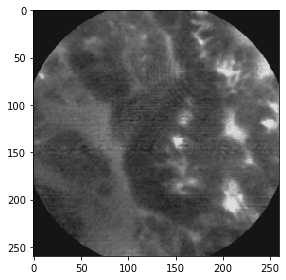

In [20]:
# con imshow podemos ver una matriz como imagen
io.imshow(img[500]) 

- Dimensión 0: 260 renglones de pixeles de arriba a abajo
- Dimensión 1: 260 columnas de pixeles de izquierda a derecha


####  Transformar imágenes en vectores
Lo primero es transformar la secuencia img en una matriz


In [22]:
# Esto convierte una serie de 5063 rennglones con una matriz en cada renglon en:
# Una matriz de 3 dimensiones 5063 (no imagenes) x 260 x 260 (tamaño imagen)
IMG = np.stack(img, axis=0)  # Toma una secuencia de matrices y las apila a lo largo 
                              # de un tercer eje para hacer una sola matriz              
IMG.shape

(5063, 260, 260)

Despues aplanar la matriz de 2D (260x260 pixeles) de cada imagen, para obtener un vector por imagen. 

In [23]:
# cambia la matriz a vector 
# usa -1 para no pensarr cual es la otra dimension "the new shape must be coherent with the first page"
# Esto aplana la matriz de 260x260 en cada renglon en un vector de 67,600 (se va poniendo uno despeus de otro)
# Esto regresa un array de 5063 vectores de 67,600
X = IMG.reshape(5063, -1)
X.shape

(5063, 67600)

##### Visualizamos ejemplos de ambas clases de imagenes

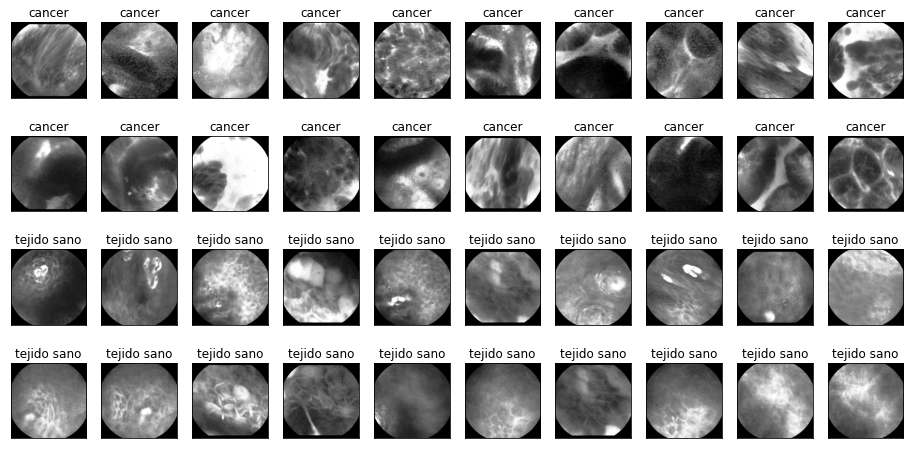

In [19]:
#El método GroupBy de Pandas separa un data frame en varios data frames
porClase = datos.groupby('class_number')

#elije al azar n muestras de cada subconjunto y guarda la posición de las figuras elegidas en una lista
n = 20
c = random.sample(porClase.get_group(1).index.tolist(), n) # indices de las imagenes cancerígenas seleccionadas
s = random.sample(porClase.get_group(0).index.tolist(), n) # indices de las imagenes sanas seleccionadas

# Grafica 20 imágenes aleatorias de tejido con cáncer y 20 de tejido sano

fig=plt.figure(figsize=(16, 8))
columns = 10
rows = 4
for i in range(0, columns * rows):
    fig.add_subplot( rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('tejido sano')
        plt.xticks([])
        plt.yticks([])
plt.show()

## Paso 3. Entrenamiento utilizando perceptrón simple con conjunto de entrenamiento y prueba

### 3.1  Crear subconjuntos de entrenamiento y prueba



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    shuffle=True, random_state=0)

In [29]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("Y: ", y_train.shape)
unique, counts= np.unique(y_train, return_counts=True)
print('Tejido Sano:        ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("Y: ", y_test.shape)
unique, counts= np.unique(y_test, return_counts=True)
print('Tejido Sano:         ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')

Training set
X:  (3544, 67600)
Y:  (3544,)
Tejido Sano:         1043 
Displasia o Cáncer:  2501 

Test set
X:  (1519, 67600)
Y:  (1519,)
Tejido Sano:          426 
Displasia o Cáncer:  1093 



### 3.2  Entrenamiento



In [30]:
# Definimos modelo
model = Perceptron(max_iter=1000,  random_state=0, verbose=True) 
model.fit(X_train,y_train)                                  

print("Iterations: ", model.n_iter_)

-- Epoch 1
Norm: 1123.26, NNZs: 67600, Bias: -39.000000, T: 3544, Avg. loss: 1641.286726
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1709.08, NNZs: 67600, Bias: -56.000000, T: 7088, Avg. loss: 1415.700003
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 2155.80, NNZs: 67600, Bias: -69.000000, T: 10632, Avg. loss: 1231.936834
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 2616.13, NNZs: 67600, Bias: -76.000000, T: 14176, Avg. loss: 1124.851144
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 3021.59, NNZs: 67600, Bias: -75.000000, T: 17720, Avg. loss: 1133.721658
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 3379.11, NNZs: 67600, Bias: -74.000000, T: 21264, Avg. loss: 971.851823
Total training time: 2.89 seconds.
-- Epoch 7
Norm: 3724.07, NNZs: 67600, Bias: -66.000000, T: 24808, Avg. loss: 937.594908
Total training time: 3.32 seconds.
-- Epoch 8
Norm: 4026.70, NNZs: 67600, Bias: -68.000000, T: 28352, Avg. loss: 855.373414
Total training time: 3.68 seconds.
-- Ep

In [31]:
#Guardamos los coeficientes del modelo como beta
# hay un. beta pa cada espacio (pixel)
beta=model.coef_
print(beta.shape)

(1, 67600)


In [32]:
beta[0, 50310:50320]

array([ -1.92002706,  26.43550275,  48.33832196,  60.5412651 ,
        36.79920392,  20.46658157,  -2.35208118, -16.18895686,
       -16.80207686,   4.81493412])

In [33]:
y_predict=model.predict(X_test)  #pasa cada una de las imágenes de X_test por el modelo 

In [34]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_predict)*100))

Accuracy: 90.19%


In [35]:
print("Precisión conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

Precisión conjunto entrenamiento: 95.49%
Precisión conjunto prueba: 90.19%


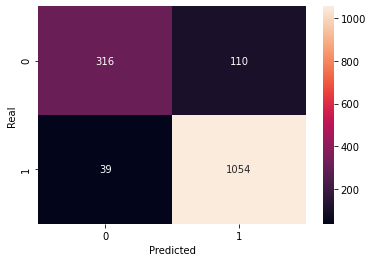

In [36]:
#Matriz de confusión

data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Paso 4. Entrenamiento de perceptron utilizando margen

In [46]:
model2 = Perceptron(max_iter=1000,  random_state=0, verbose=True, penalty='l2',  alpha=0.0001) 
model2.fit(X_train,y_train)                                  

print("Precisión conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


-- Epoch 1
Norm: 956.49, NNZs: 67600, Bias: -45.000000, T: 3544, Avg. loss: 1663.549254
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1297.28, NNZs: 67600, Bias: -71.000000, T: 7088, Avg. loss: 1484.146212
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1487.48, NNZs: 67600, Bias: -94.000000, T: 10632, Avg. loss: 1342.727950
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 1584.17, NNZs: 67600, Bias: -110.000000, T: 14176, Avg. loss: 1347.351197
Total training time: 1.78 seconds.
-- Epoch 5
Norm: 1642.57, NNZs: 67600, Bias: -124.000000, T: 17720, Avg. loss: 1318.427635
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 1638.52, NNZs: 67600, Bias: -132.000000, T: 21264, Avg. loss: 1204.883057
Total training time: 2.62 seconds.
-- Epoch 7
Norm: 1686.24, NNZs: 67600, Bias: -149.000000, T: 24808, Avg. loss: 1300.101522
Total training time: 3.05 seconds.
-- Epoch 8
Norm: 1767.77, NNZs: 67600, Bias: -166.000000, T: 28352, Avg. loss: 1276.044756
Total training time: 3.47 seconds

In [52]:
model2 = Perceptron(max_iter=1000,  random_state=0, verbose=True, penalty='l2', alpha=0.000005) 
model2.fit(X_train,y_train)                                  

print("Precisión conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


-- Epoch 1
Norm: 1080.33, NNZs: 67600, Bias: -38.000000, T: 3544, Avg. loss: 1636.005336
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1690.26, NNZs: 67600, Bias: -60.000000, T: 7088, Avg. loss: 1442.916757
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 2121.29, NNZs: 67600, Bias: -71.000000, T: 10632, Avg. loss: 1265.319968
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 2547.83, NNZs: 67600, Bias: -74.000000, T: 14176, Avg. loss: 1178.459801
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 2878.70, NNZs: 67600, Bias: -76.000000, T: 17720, Avg. loss: 1076.948152
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 3205.12, NNZs: 67600, Bias: -73.000000, T: 21264, Avg. loss: 998.845010
Total training time: 2.62 seconds.
-- Epoch 7
Norm: 3528.04, NNZs: 67600, Bias: -75.000000, T: 24808, Avg. loss: 957.843483
Total training time: 3.02 seconds.
-- Epoch 8
Norm: 3824.63, NNZs: 67600, Bias: -71.000000, T: 28352, Avg. loss: 928.381061
Total training time: 3.45 seconds.
-- Ep

In [53]:
model2 = Perceptron(max_iter=1000,  random_state=0, verbose=True, penalty='l2', alpha=0.000001) 
model2.fit(X_train,y_train)                                  

print("Precisión conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))


-- Epoch 1
Norm: 1112.79, NNZs: 67600, Bias: -37.000000, T: 3544, Avg. loss: 1621.766050
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1714.83, NNZs: 67600, Bias: -59.000000, T: 7088, Avg. loss: 1452.427944
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 2202.22, NNZs: 67600, Bias: -72.000000, T: 10632, Avg. loss: 1226.970560
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 2655.84, NNZs: 67600, Bias: -75.000000, T: 14176, Avg. loss: 1115.456112
Total training time: 1.78 seconds.
-- Epoch 5
Norm: 3027.50, NNZs: 67600, Bias: -80.000000, T: 17720, Avg. loss: 1087.195590
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 3385.38, NNZs: 67600, Bias: -81.000000, T: 21264, Avg. loss: 982.833779
Total training time: 2.61 seconds.
-- Epoch 7
Norm: 3713.38, NNZs: 67600, Bias: -72.000000, T: 24808, Avg. loss: 929.228131
Total training time: 3.02 seconds.
-- Epoch 8
Norm: 4028.89, NNZs: 67600, Bias: -72.000000, T: 28352, Avg. loss: 900.311960
Total training time: 3.43 seconds.
-- Ep